## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

# Load and import CSV files and read them
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
#keep only the drugs we want to examine
merged_df = merged_df[(merged_df["Drug Regimen"] == 'Capomulin') |
                      (merged_df['Drug Regimen'] == 'Infubinol') |
                      (merged_df["Drug Regimen"] == 'Ketapril') |
                      (merged_df["Drug Regimen"] == 'Placebo')]
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


## Summary statistics

In [26]:
# Average tumor size cals
avg_vol = pd.DataFrame(merged_df.groupby(['Drug Regimen', 'Timepoint']).mean()['Tumor Volume (mm3)'])
vol_sem = pd.DataFrame(merged_df.groupby(['Drug Regimen', 'Timepoint']).sem()['Tumor Volume (mm3)'])

#Reformat data
avg_vol = avg_vol.unstack(level = 0)
avg_vol.columns = avg_vol.columns.get_level_values(1)
avg_vol.head()

Drug Regimen,Capomulin,Placebo
Timepoint,,
0,45.000000,45.000000
5,44.266086,47.125589
10,43.084291,49.423329
15,42.064317,51.359742
20,40.716325,54.364417


In [12]:
# Avg tumor volume data - std error
vol_sem = vol_sem.unstack(level=0)
vol_sem.columns = vol_sem.columns.get_level_values(1)
vol_sem.head()

Drug Regimen,Capomulin,Placebo
Timepoint,,
0,0.000000,0.000000
5,0.448593,0.218091
10,0.702684,0.402064
15,0.838617,0.614461
20,0.909731,0.839609


In [13]:
#group by treatment for change in average tumor size calculations
avg_vol = pd.DataFrame(merged_df.groupby(['Drug Regimen', 'Timepoint']).mean()['Tumor Volume (mm3)'])
vol_sem = pd.DataFrame(merged_df.groupby(['Drug Regimen', 'Timepoint']).sem()['Tumor Volume (mm3)'])

In [14]:
#reshaping of avg tumor volume data
avg_vol = avg_vol.unstack(level = 0)
avg_vol.columns = avg_vol.columns.get_level_values(1)
avg_vol.head()

Drug Regimen,Capomulin,Placebo
Timepoint,,
0,45.000000,45.000000
5,44.266086,47.125589
10,43.084291,49.423329
15,42.064317,51.359742
20,40.716325,54.364417


In [15]:
# Avg tumor volume data - std error
vol_sem = vol_sem.unstack(level=0)
vol_sem.columns = vol_sem.columns.get_level_values(1)
vol_sem.head()

Drug Regimen,Capomulin,Placebo
Timepoint,,
0,0.000000,0.000000
5,0.448593,0.218091
10,0.702684,0.402064
15,0.838617,0.614461
20,0.909731,0.839609


No handles with labels found to put in legend.


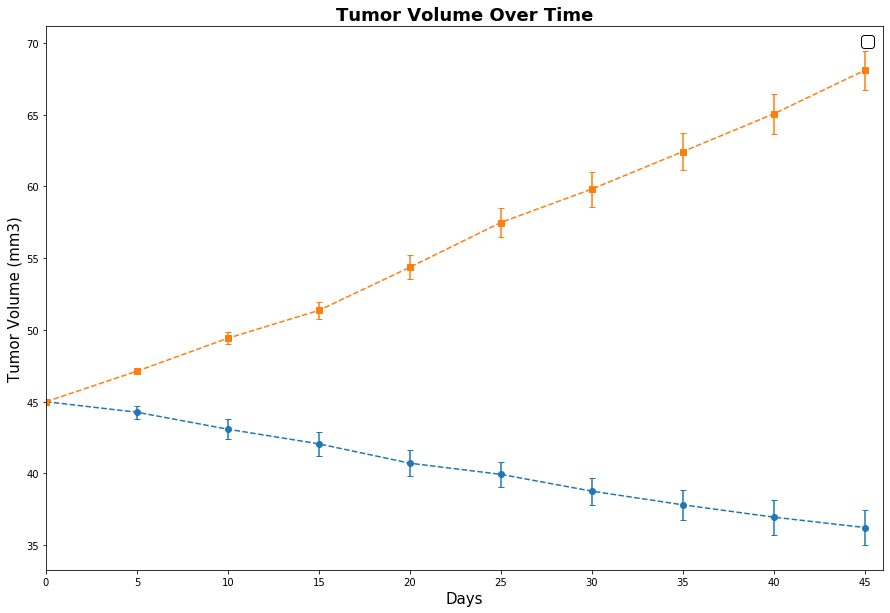

In [16]:
#plot options
plt.figure(figsize = (15,10))
plt.title('Tumor Volume Over Time', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, avg_vol.index.max()+3 , 5)) 
plt.xlim(0, avg_vol.index.max() + 1) 
markers = ['o', 's', '^', 'd']
xvals = avg_vol.index #timepoints

#count for markers in plot loop
count = 0

#plot each tumor volume column with standard error
for c in avg_vol.columns:
    plt.errorbar(xvals, 
                 avg_vol[c], 
                 vol_sem[c], 
                 linestyle = '--', 
                 marker =  markers[count], 
                 capthick = 1, 
                 capsize = 3)  
    count += 1

#legend options
legend = plt.legend(numpoints = 2, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)
plt.show()

In [18]:
#group by treatment for metastatic site counts and std error
avg_num_spread = pd.DataFrame(merged_df.groupby(['Drug Regimen', 'Timepoint']).mean()['Metastatic Sites'])
avg_spread_err = pd.DataFrame(merged_df.groupby(['Drug Regimen', 'Timepoint']).sem()['Metastatic Sites'])

#reshaping of metastatic site data
avg_num_spread = avg_num_spread.unstack(level = 0)
avg_num_spread.columns = avg_num_spread.columns.get_level_values(level = 1)
avg_num_spread.head()

Drug Regimen,Capomulin,Placebo
Timepoint,,
0,0.000000,0.000000
5,0.160000,0.375000
10,0.320000,0.833333
15,0.375000,1.250000
20,0.652174,1.526316


In [19]:
# Rformate data metastatic data - std error
avg_spread_err = avg_spread_err.unstack(level = 0)
avg_spread_err.columns = avg_spread_err.columns.get_level_values(level = 1)
avg_spread_err

Drug Regimen,Capomulin,Placebo
Timepoint,,
0,0.000000,0.000000
5,0.074833,0.100947
10,0.125433,0.115261
15,0.132048,0.190221
20,0.161621,0.234064
25,0.181818,0.263888
30,0.172944,0.300264
35,0.169496,0.341412
40,0.175610,0.297294


No handles with labels found to put in legend.


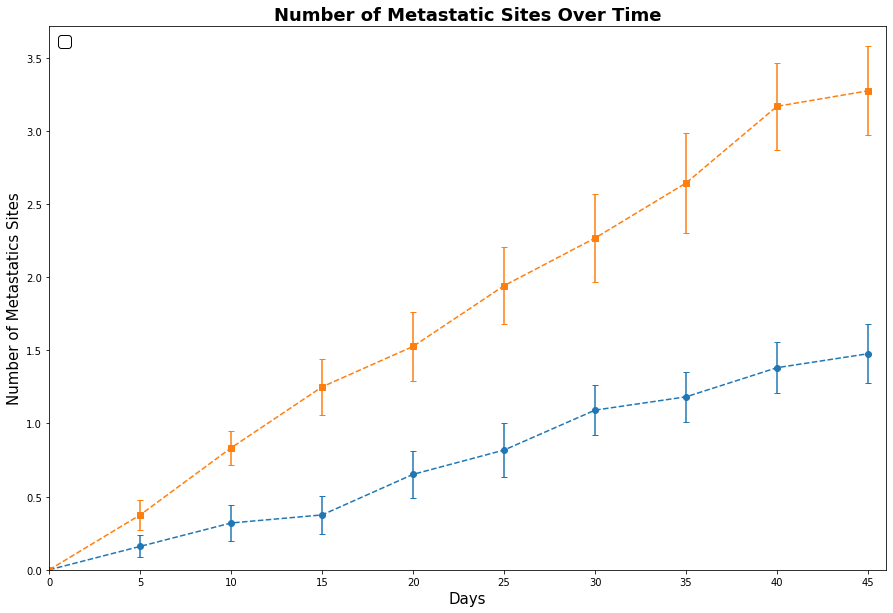

In [20]:
#Plot options
plt.figure(figsize = (15,10))
plt.title('Number of Metastatic Sites Over Time', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Number of Metastatics Sites', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0,avg_num_spread.index.max() + 3 ,5))
plt.xlim(0, avg_num_spread.index.max()+1)
plt.ylim(0, avg_num_spread.max().max() + avg_spread_err.max().max() + .1)
count = 0 
xvals = avg_num_spread.index
for c in avg_num_spread:
    plt.errorbar(xvals, 
                 avg_num_spread[c], 
                 avg_spread_err[c], 
                 linestyle = '--', 
                 marker =  markers[count], 
                 capthick = 1, 
                 capsize = 3)
    count += 1    
lg = plt.legend(numpoints = 2, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)

plt.show()

In [22]:
# dataframe at each time point per drug
mice_count = merged_df.groupby(['Drug Regimen', 'Timepoint']).count()['Mouse ID']
mice_count = mice_count.unstack(level = 0)
mice_count

Drug Regimen,Capomulin,Placebo
Timepoint,,
0,25,25
5,25,24
10,25,24
15,24,20
20,23,19
25,22,17
30,22,15
35,22,14
40,21,12


No handles with labels found to put in legend.


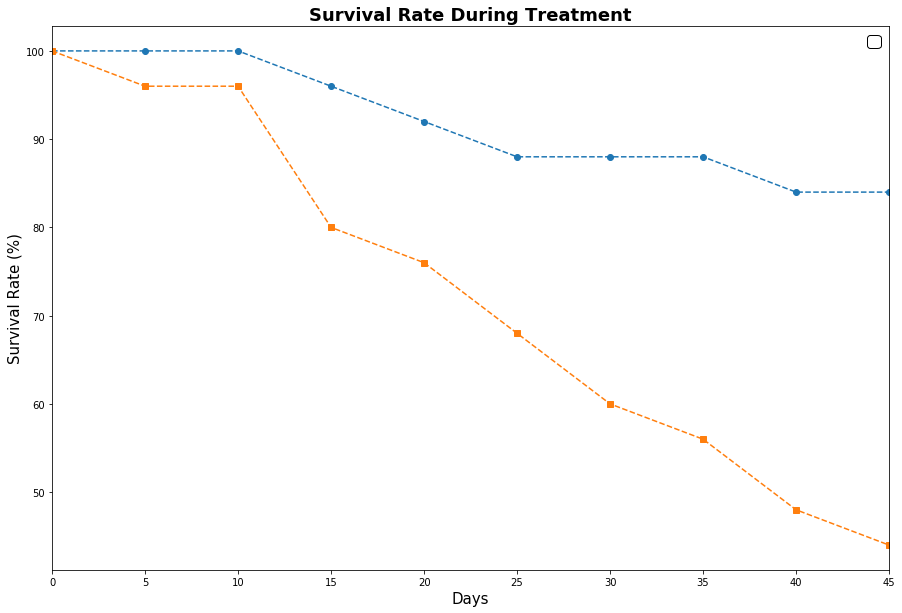

In [23]:
#plot options
plt.figure(figsize = (15,10))
plt.title('Survival Rate During Treatment', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Survival Rate (%)', fontdict = {'fontsize': 15})
plt.xlim(0, mice_count.index.max())
xvals = mice_count.index 
count = 0 
for c in mice_count:
    yvals = mice_count[c]/mice_count.loc[0,c] * 100 
    plt.plot(xvals, 
             yvals, 
             linestyle = '--', 
             marker =  markers[count])
    count += 1
lg = plt.legend(numpoints = 2, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)

plt.show()

In [24]:
# Tumor change for each drug
tumor_change = (avg_vol.loc[45, :] - avg_vol.loc[0, :])/avg_vol.loc[0, :] * 100
tumor_change

Drug Regimen
Capomulin   -19.475303
Placebo      51.297960
dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

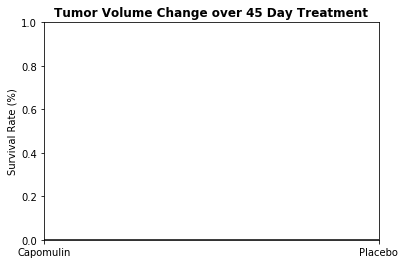

In [25]:
# plot options
plt.title('Tumor Volume Change over 45 Day Treatment', fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Survival Rate (%)')
plt.axhline(y=0, color = 'black') 
xlabels = tumor_change.index
plt.xticks(np.arange(len(xlabels)), xlabels)

plt.bar(np.arange(4), 
        tumor_change, 
        color = ['red' if tumor_change[r] > 0 else 'green' for r in np.arange(len(xlabels))])
count = 0

for r in tumor_change:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', color = 'white')
    count += 1
    
plt.show()